25.55598026725506
1.6405196457374616
0.10524249296773862
0.006751439236791268
0.0004331133094088094
2.778476297263422e-05


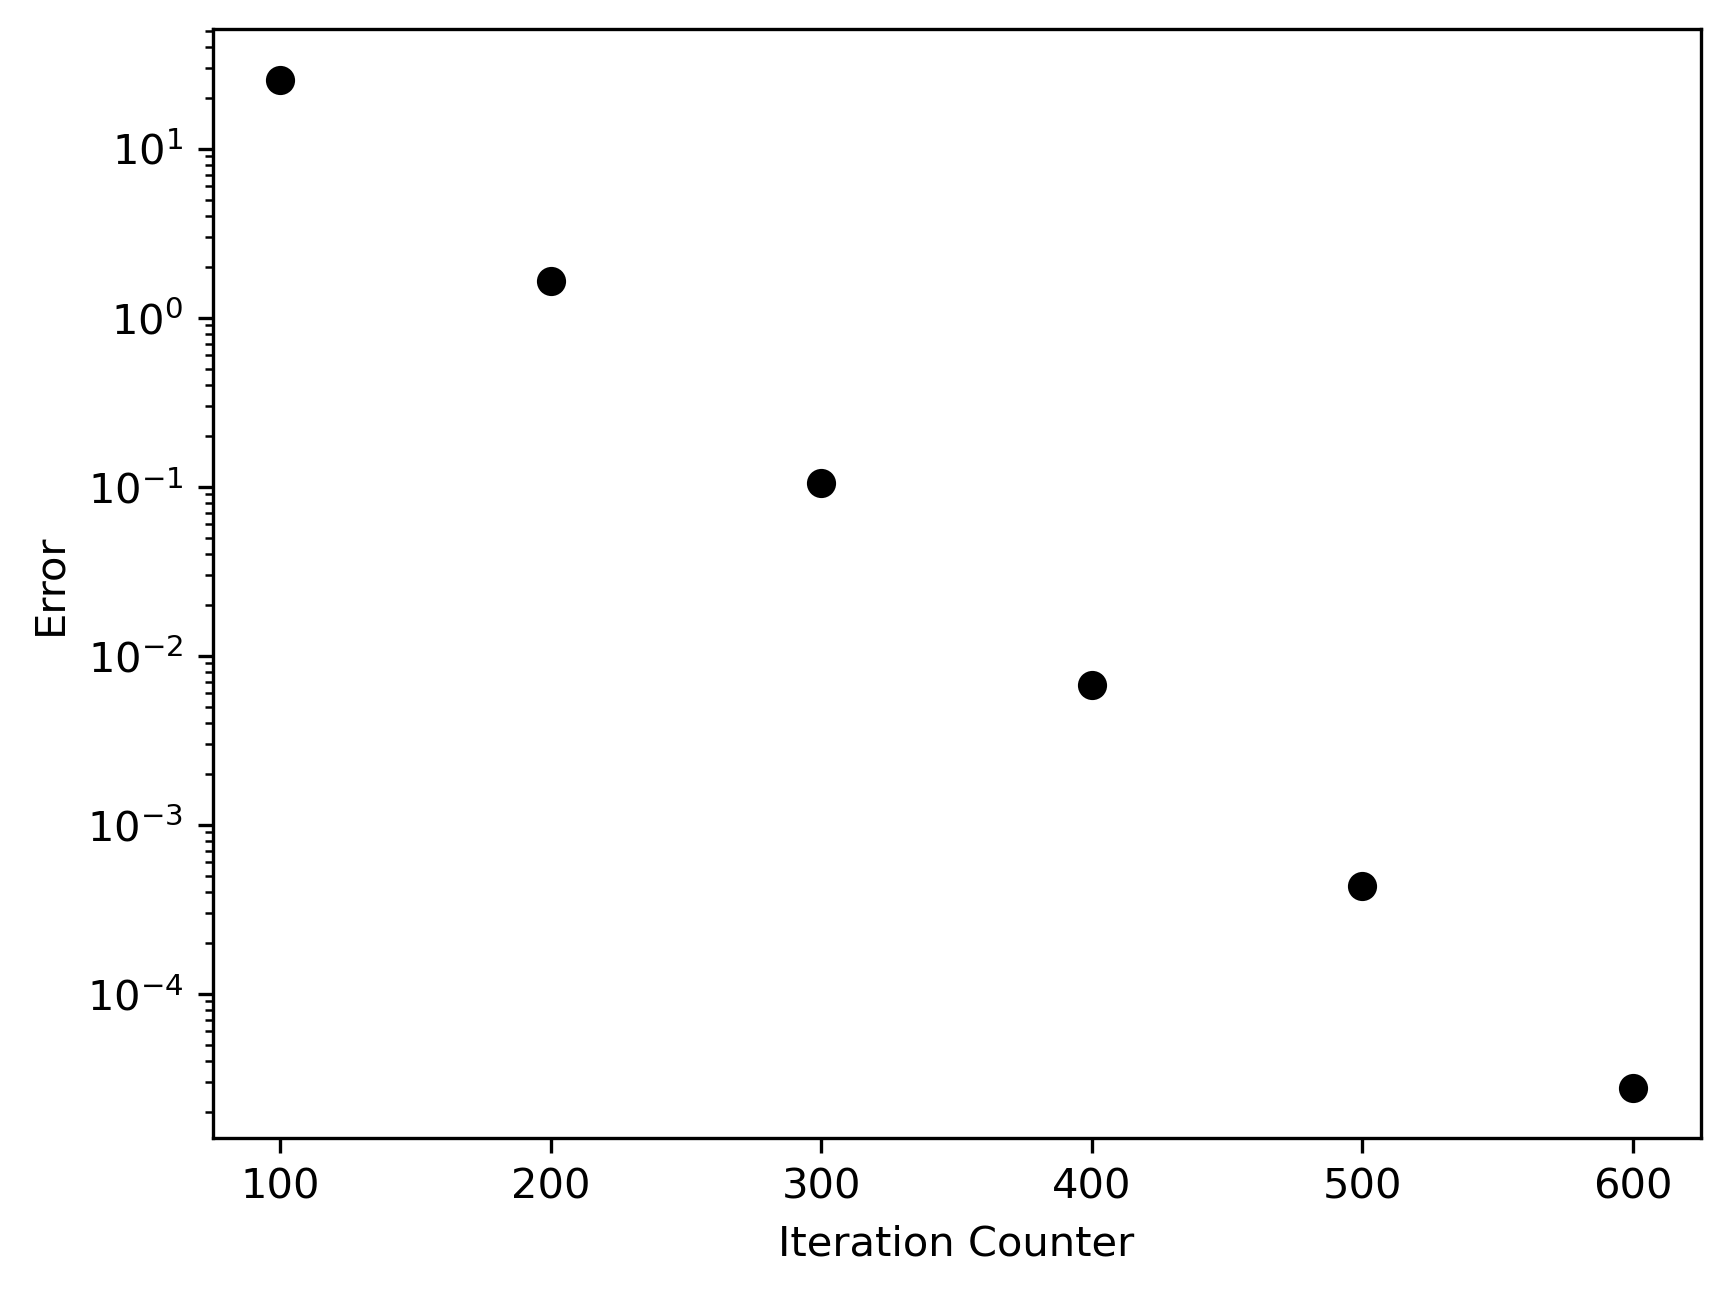

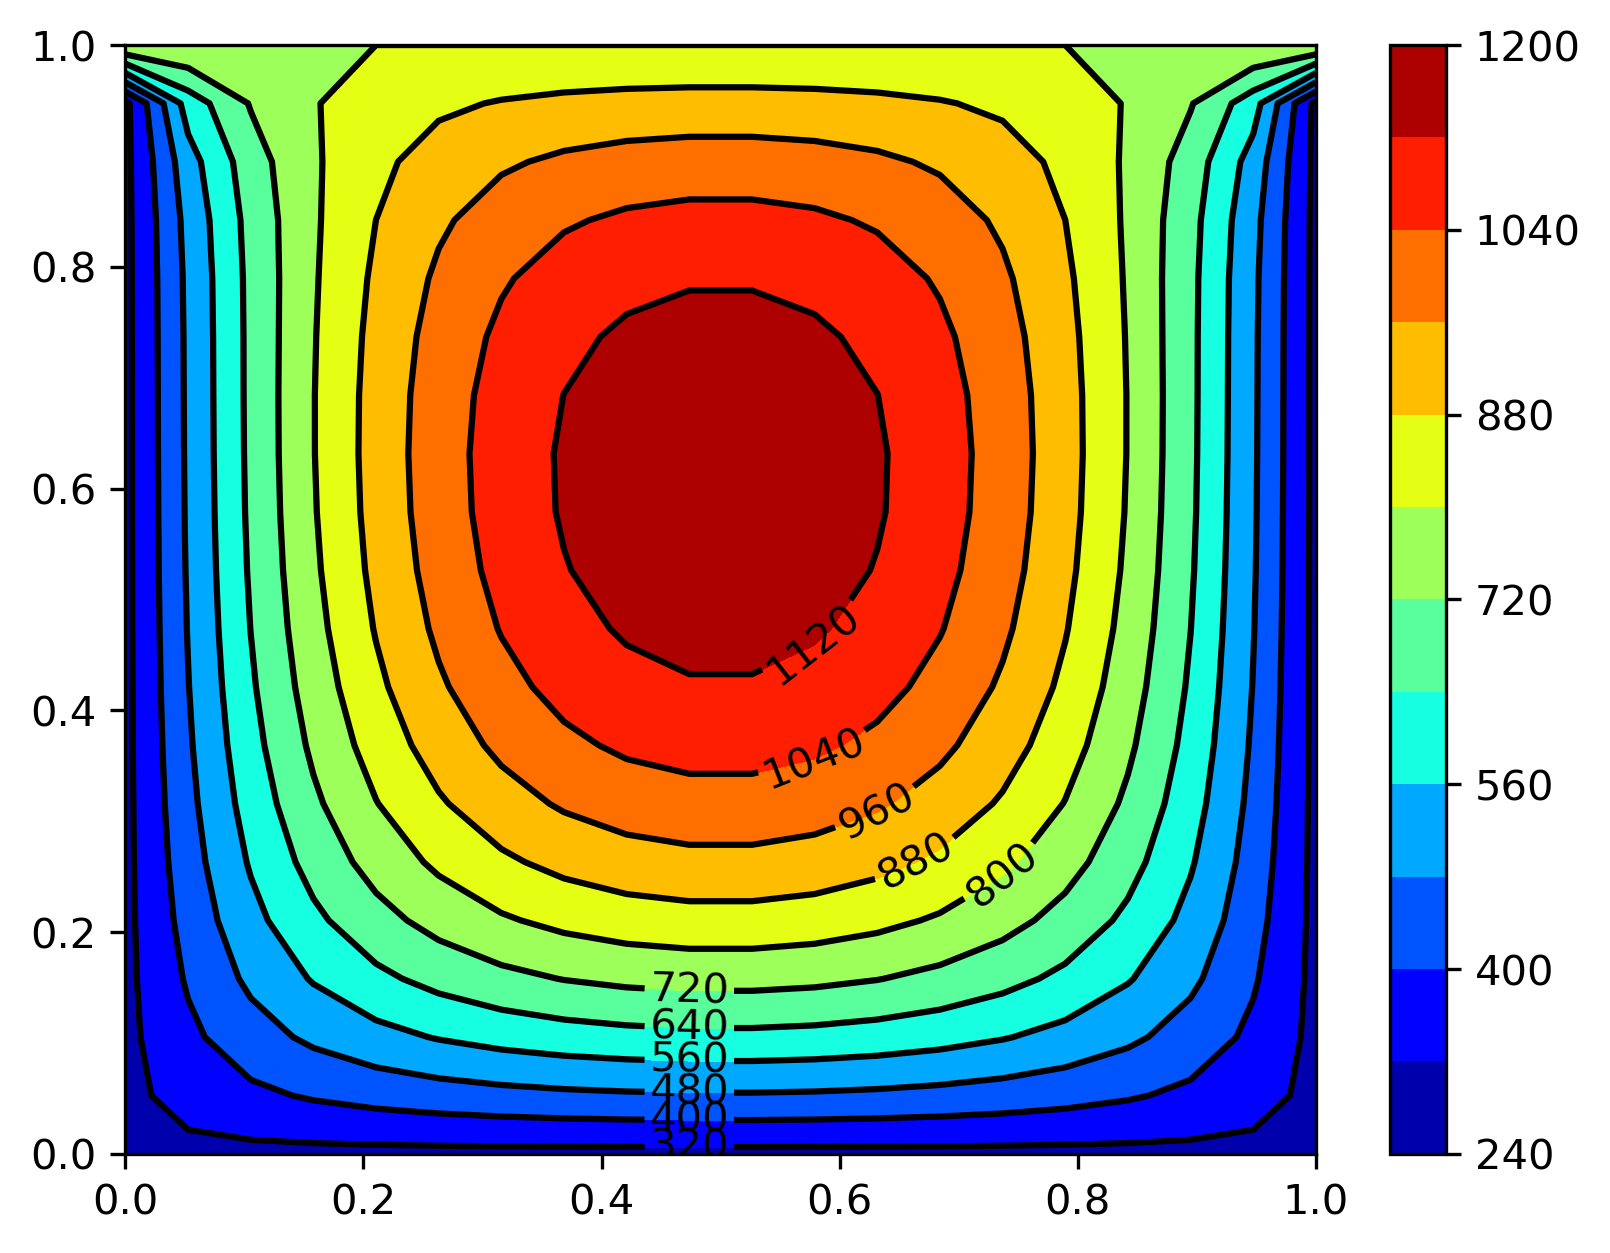

In [6]:
# Importing modules
from pylab import *
from numpy import *

# Defining thermal properties
# case 1
# qg=0
# case 2
qg = 1000000
k = 100

# Define domain
ℓx = 1.0
ℓy = 1.0

# Number of grid points
nx = 20
ny = 20

# Grid spacing
Δx = ℓx / (nx - 1)
Δy = ℓy / (ny - 1)
Δ = Δx

# Grid generation
x = linspace(0, ℓx, nx)
y = linspace(0, ℓy, ny)
X, Y = meshgrid(x, flipud(y))

# Initial Guess
T = zeros(shape=(nx, ny))

# Boundary conditions
# left
T[:, 0] = 300
# right
T[:, -1] = 300
# top
T[0, :] = 800
# bottom
T[-1, :] = 300

# Guess array for comparison
Tg = T.copy()

# Initial error or entry in loop
error = 1

# Iteration counter
count = 1

# Comparison loop
while error > 1.E-5:
    # Sweeping in the domain
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            T[i, j] = (T[i, j - 1] + T[i, j + 1] + T[i - 1, j] + T[i + 1, j] + Δ ** 2 * qg / k) / 4
    # Evaluating and printing error
    error = sqrt(sum(abs(T - Tg) ** 2))
    figure(1, dpi=300)
    if count % 100 == 0:
        print(error)
        semilogy(count, error, 'ko')
    xlabel("Iteration Counter")
    ylabel("Error")
    savefig("Error.jpg")

    # Updating guess for next iteration
    Tg = T.copy()

    # Incrementing counter
    count += 1

# Result Plotting (Temperature contour plot)
figure(3, dpi=300)
cp1 = contourf(X, Y, T, 10, cmap='jet')
colorbar()
cp1 = contour(X, Y, T, 10, colors='k')
clabel(cp1, inline=True, fontsize=10)
savefig("temp.jpg")